In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon


# Import Mask RCNN
# To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline

In [2]:
import coco

config = coco.CocoConfig()
COCO_DIR=r"D:\swaranjit\road_lane_instance_segmentation" #change the coco here, the main directory where train and val file lies

In [3]:
class InferenceConfig(config.__class__):
    NAME = "shapes"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1+7 #change the class number here

    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128

    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    STEPS_PER_EPOCH = 100
    VALIDATION_STEPS = 5

    #IMAGE_META_SIZE = 22


config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        35
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                20
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [4]:
def get_ax(rows=1,cols=1,size=16):
    _,ax=plt.subplot(rows,cols,figsize=(size*cols,size*rows))
    return ax

In [5]:

dataset_train = coco.CocoDataset()
dataset_train.load_coco(COCO_DIR, "train", year="2017") # from coco directory find the train and year
dataset_train.prepare()


dataset_val = coco.CocoDataset()
dataset_val.load_coco(COCO_DIR, "val", year="2017")
dataset_val.prepare()

print("Images: {}\nClasses: {}".format(len(dataset_train.image_ids), dataset_train.class_names))

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Images: 1018
Classes: ['BG', 'road-roads', 'divider-line', 'dotted-line', 'double-line', 'random-line', 'road-sign-line', 'solid-line']


In [6]:
class_name=['BG', 'road-roads', 'divider-line', 'dotted-line', 'double-line', 'random-line', 'road-sign-line', 'solid-line']

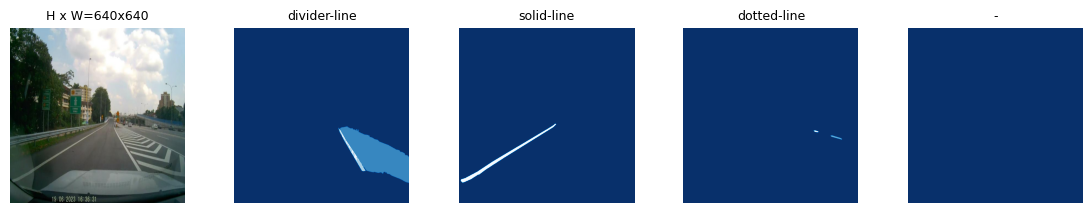

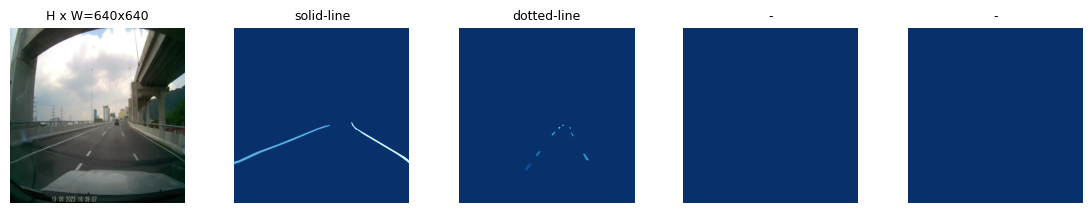

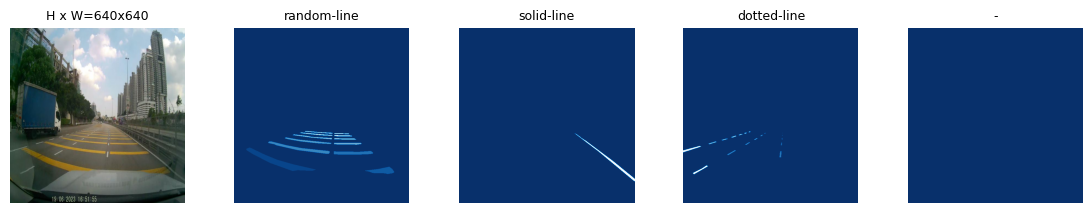

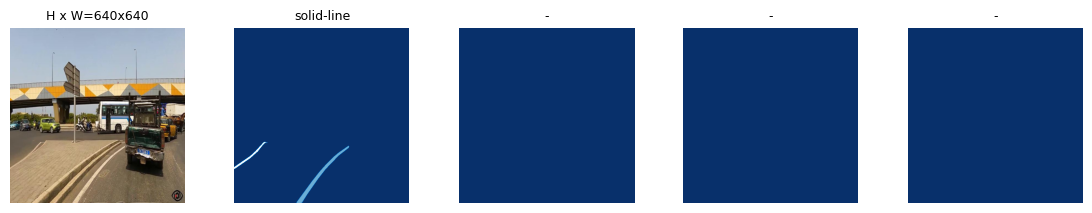

In [7]:
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [8]:
ROOT_DIR = os.path.abspath("../../")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [9]:
COCO_MODEL_PATH = os.path.join("mask_rcnn_coco.h5")
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

In [10]:
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=5, 
            layers='all')


Starting at epoch 0. LR=0.001

Checkpoint Path: C:\Users\Lenovo\logs\shapes20250511T1707\mask_rcnn_shapes_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b   

C:\Users\Lenovo\miniconda3\envs\mrcnn\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5


C:\Users\Lenovo\miniconda3\envs\mrcnn\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/sub:0", shape=(None,), dtype=int32), values=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/GatherV2_2:0", shape=(None, 7, 7, 256), dtype=float32), dense_shape=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/Shape:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
C:\Users\Lenovo\miniconda3\envs\mrcnn\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/sub_1:0", shape=(None,), dtype=int32), values=Tensor("training/SGD/gradients/gradients/roi_align_classifier/con

100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 1.0000 - loss: 5.6540 - rpn_class_loss: 0.7194 - rpn_bbox_loss: 3.3246 - mrcnn_class_loss: 0.4769 - mrcnn_bbox_loss: 0.7825 - mrcnn_mask_loss: 0.3507

C:\Users\Lenovo\miniconda3\envs\mrcnn\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


100/100 [==============================] - 80s 617ms/step - batch: 49.5000 - size: 1.0000 - loss: 5.6540 - rpn_class_loss: 0.7194 - rpn_bbox_loss: 3.3246 - mrcnn_class_loss: 0.4769 - mrcnn_bbox_loss: 0.7825 - mrcnn_mask_loss: 0.3507 - val_loss: 3.8301 - val_rpn_class_loss: 0.2274 - val_rpn_bbox_loss: 2.4934 - val_mrcnn_class_loss: 0.2022 - val_mrcnn_bbox_loss: 0.5818 - val_mrcnn_mask_loss: 0.3253
Epoch 2/5
100/100 [==============================] - 35s 350ms/step - batch: 49.5000 - size: 1.0000 - loss: 3.9511 - rpn_class_loss: 0.2436 - rpn_bbox_loss: 2.2929 - mrcnn_class_loss: 0.4063 - mrcnn_bbox_loss: 0.6362 - mrcnn_mask_loss: 0.3721 - val_loss: 3.8657 - val_rpn_class_loss: 0.3057 - val_rpn_bbox_loss: 2.3089 - val_mrcnn_class_loss: 0.4837 - val_mrcnn_bbox_loss: 0.4386 - val_mrcnn_mask_loss: 0.3288
Epoch 3/5
100/100 [==============================] - 33s 333ms/step - batch: 49.5000 - size: 1.0000 - loss: 3.9717 - rpn_class_loss: 0.2167 - rpn_bbox_loss: 2.4101 - mrcnn_class_loss: 0.3665

In [11]:
model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  C:\Users\Lenovo\logs\shapes20250511T1707\mask_rcnn_shapes_0005.h5
Re-starting from epoch 5


original_image           shape: (128, 128, 3)         min:    0.00000  max:  255.00000  uint8
image_meta               shape: (20,)                 min:    0.00000  max:  640.00000  float64
gt_class_id              shape: (5,)                  min:    2.00000  max:    7.00000  int32
gt_bbox                  shape: (5, 4)                min:    0.00000  max:  119.00000  int32
gt_mask                  shape: (128, 128, 5)         min:    0.00000  max:    1.00000  bool


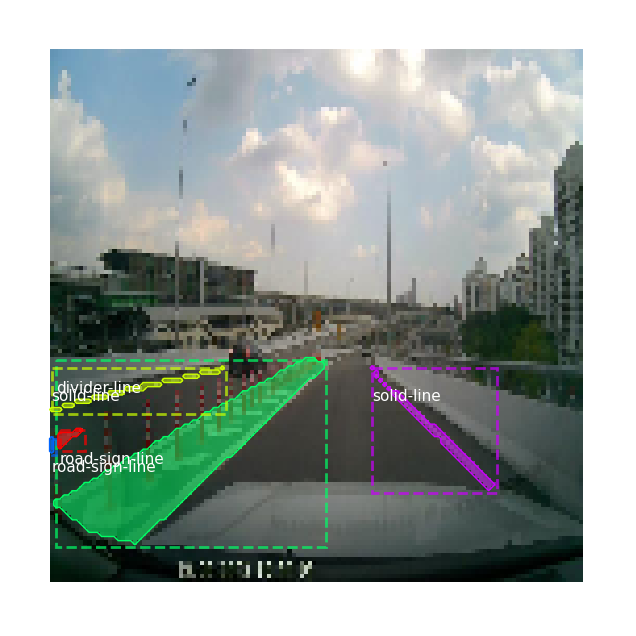

In [18]:
inference_config = InferenceConfig()

image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)


visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))